## Final Project Submission

* Student name: Manuel Klein
* Date: 11/04/2019

# King County House Price Prediction

## Introduction and overview:

This Jupyter Notebook analyzes the dependency of house prices in King County, Washington, on the basis of various features. A linear regression model is used to model the dependencies and make predictions.

The notebook is divided into the following steps:

1. Importing Python libraries and dataset
2. Understanding the data
3. Revising the data on basis of the insights from the previous step
4. Identifying the relevant features
5. Performing the linear regression
6. Conclusions / Recommendations
7. Outlook / Next steps

## Step 1: Importing Python libraries and dataset

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This just tells the IPython notebook to plot it inline (i.e. in the browser).
%matplotlib inline
# This will change the style that matplotlib uses (i.e. makes the plots look nicer than the default)
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

In [2]:
# Importing the dataset
df = pd.read_csv("King_County_House_prices_dataset.csv")

## Step 2: Understanding the data

### Column Names and descriptions for Kings County Data Set

This information was made available together with the raw data.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  number of Bedrooms/House
* **bathroomsNumber** -  number of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall ) --> Details below
* **grade** - overall grade given to the housing unit, based on King County grading system --> Details below
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Additional information on condition and building grades could be found online:
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

Condition: Relative to Age and Grade
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.


Residential Building Grades

- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries.

### First impression of the data

In [3]:
# Getting an overview of the overall dataset
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [4]:
df.tail(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Missing Data - NaN Values

In [6]:
# Find number of NaN values for each feature
df.isna().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [7]:
df.shape

(21597, 21)

In [8]:
df.dropna().shape

(15762, 21)

In [10]:
# Percentage of rows that is lost by dropping all rows containing one ore more NaN values
(1-(df.dropna().shape[0]/df.shape[0]))*100

27.01764133907487

### Missing Data - Zero Values

In [11]:
# Find number of 0.0 values for each feature
for i in df.columns:
    print(i, list(df[i].values).count(0))

id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 19075
view 19422
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 17011
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


## Step 3: Revising the data on basis of the insights from the previous step

Measures to perform:
1. Deletion of the feature "id", as there is no causal link between id and house price
2. Transforming the feature "date" into months
3. Multiplying the number of bathrooms with the number of bedrooms to receive the absolute number of bathrooms
4. Replacement of "sqft_basement" by subtracting sqft_above from sqft_living as sqft_basement is the only of these three variables containing missing values
5. sqft_living to be removed as it is the sum of sqft_above and sqft_basement
6. yr_built to be transformed into age
7. Deletion of the feature "yr_renovated", as just a small number of objects has been renovated. Besides this information is also covered by condition and grade.
8. Dropping all rows that contain NaN values

In [14]:
# Measure 1: Deleting feature "id"
df.drop("id", axis=1, inplace=True)

In [15]:
# Measure 2: Transforming dates into months
df['date'] = pd.to_datetime(df.date)
df['month'] = df['date'].dt.strftime('%m').astype(str).astype(int)
df.drop("date", axis=1, inplace=True)

In [16]:
# Measure 3: Bathroom multiplication
df["bathrooms"] = df["bathrooms"]*df["bedrooms"]

In [17]:
# Measure 4: ? Replacement for "sqft_basement"
df["sqft_basement"] = df["sqft_living"]-df["sqft_above"]

In [18]:
# Measure 5: Deleting feature "sqft_living"
df.drop("sqft_living", axis=1, inplace=True)

In [19]:
# Measure 6: yr_build into age transformation
df["age"] = 2019 - df["yr_built"].values
df.drop("yr_built", axis=1, inplace=True)

In [20]:
# Measure 7: Deleting feature "yr_renovated"
df.drop("yr_renovated", axis=1, inplace=True)

In [21]:
# Measure 8: Dropping NaN values
df.dropna(inplace=True)

In [22]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,age
1,538000.0,3,6.75,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,12,68
2,180000.0,2,2.00,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2,86
3,604000.0,4,12.00,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,12,54
4,510000.0,3,6.00,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2,32
5,1230000.0,4,18.00,101930,1.0,0.0,0.0,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,5,18


### Interim Result: Features after revision

After having cleaned the data, the following features are used for the further analysis:

**[feature name] - [description] - [unit]**

* **month** - month in which house was sold - []
* **price** -  is prediction target - [Dollar]
* **bedrooms** -  number of Bedrooms/House - [Bedrooms]
* **bathrooms** -  number of bathrooms - [Bathrooms]
* **sqft_lot** -  footage of the lot - [Square Feet]
* **floors** -  floors in house - [Floors]
* **waterfront** - House which has a view to a waterfront. Assumption: 1=yes, 0=no - []
* **view** - Has been viewed. Assumption: Number of prospective buyers that have viewed the house. - [Viewers]
* **condition** - How good the condition is (Overall). Discrete from 1 (bad) to 5 (excellent) - []
* **grade** - overall grade given to the housing unit, based on King County grading system. Discrete from 1 (bad) to 13 (excellent) - []
* **sqft_above** - square footage of house apart from basement - [Square Feet]
* **sqft_basement** - square footage of the basement - [Square Feet]
* **yr_renovated** - Year when house was renovated. 0 means never - []
* **zipcode** - zip - []
* **lat** - Latitude coordinate - []
* **long** - Longitude coordinate - []
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors - [Square Feet]
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors - [Square Feet]
* **age** - Age of the house relative to the year 2019 - [years]

In [23]:
# Check if all features are numerical after having performed the revision
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 18 columns):
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null int64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
month            19164 non-null int64
age              19164 non-null int64
dtypes: float64(7), int64(11)
memory usage: 2.8 MB


### Understand the house prices

In [26]:
# For better readability, the Histogram is reduced by approximately the highest 1% of house prices.
# Thus outliers are not shown in the histogram.
((len(df)-len(df["price"][df["price"] < 2000000]))/len(df))*100

0.9914422876226258

In [46]:
from numpy.random import normal
from scipy.stats import norm

In [ ]:
price_hist = pd.DataFrame(df["price"][df["price"] < 2000000])

In [51]:
n = norm.fit(price_hist)
n

(519265.1987456519, 286599.73367805406)

In [52]:
μ = n[0]
σ = n[1]

//anaconda3/envs/nf/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


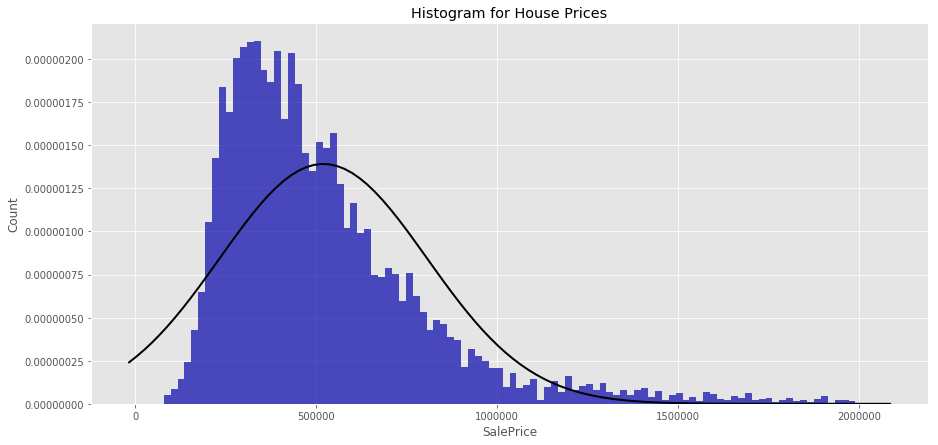

In [61]:
plt.figure(figsize=(15,7))
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('Histogram for House Prices')
plt.hist(price_hist["price"], bins=100, normed=True, alpha=0.7, color="#0504aa")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, μ, σ)
plt.plot(x, p, 'k', linewidth=2);

In [12]:
df["price"].min()

78000.0

In [13]:
df["price"].max()

7700000.0

In [28]:
df["price"].mean()

541448.9606032143

In [29]:
df["price"].std()

370900.93771924614

### Dependency of house prices on the given features

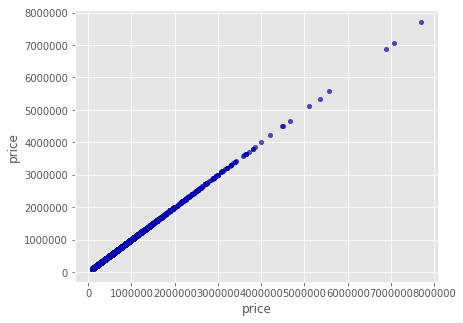

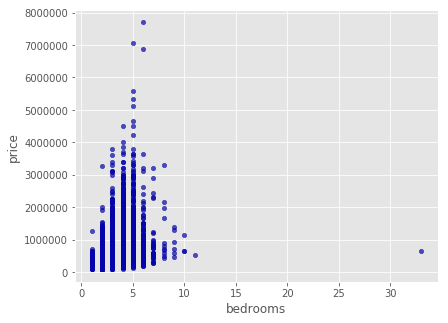

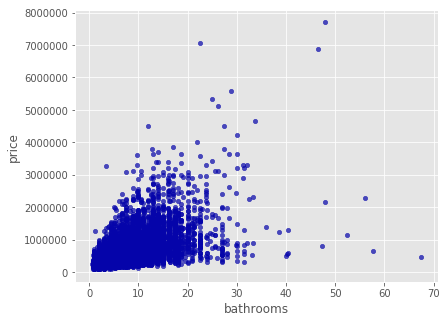

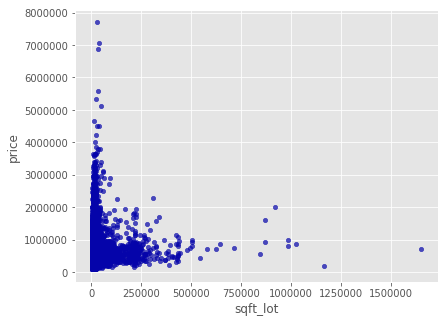

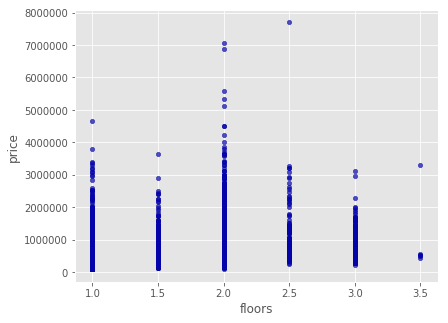

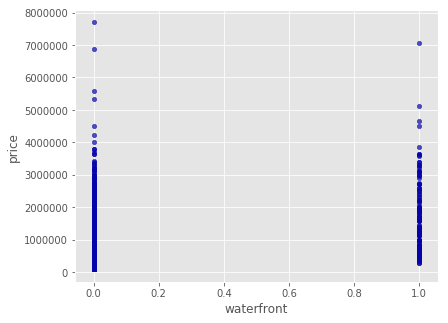

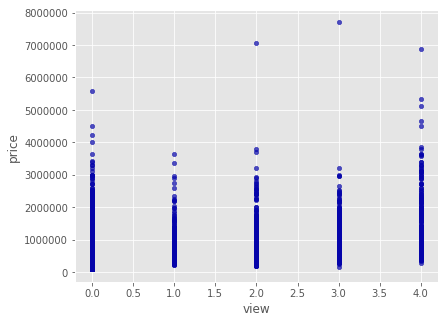

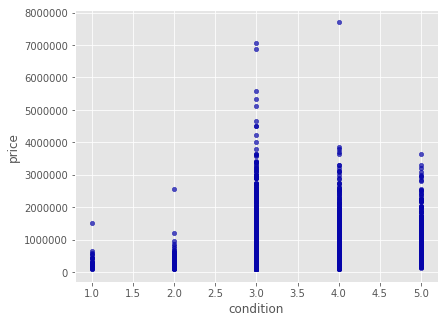

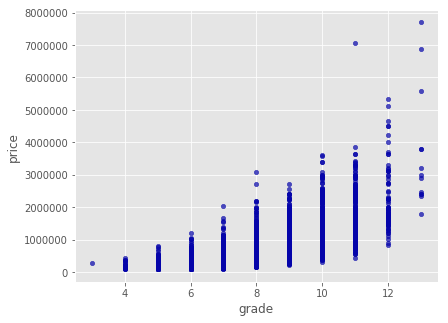

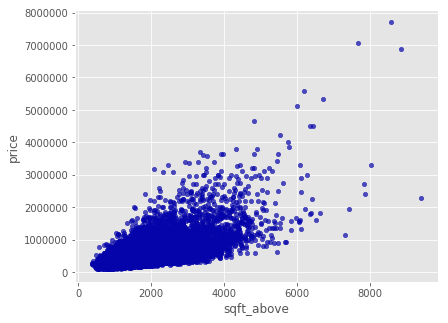

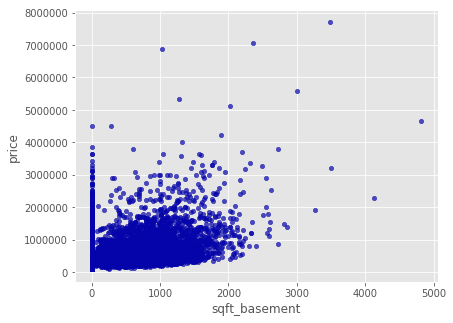

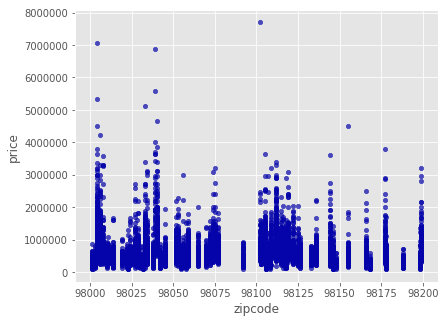

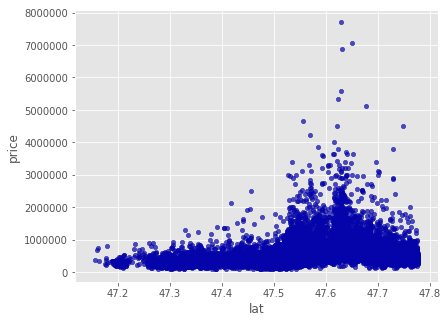

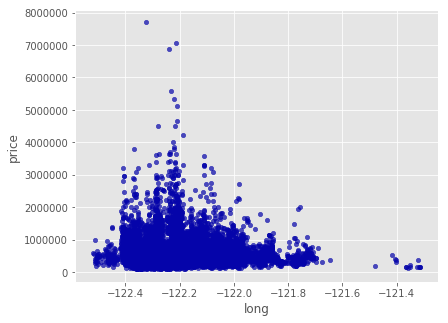

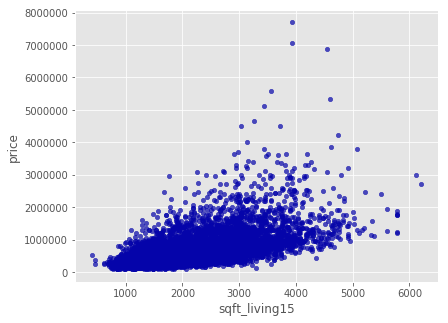

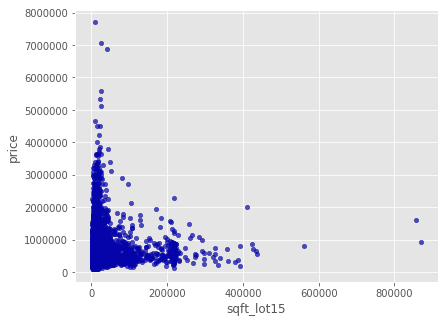

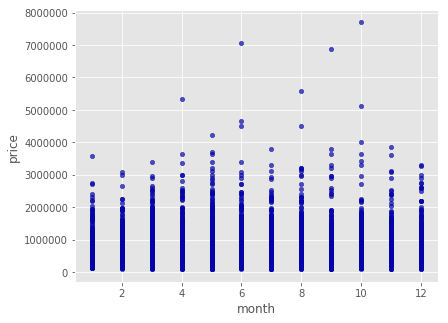

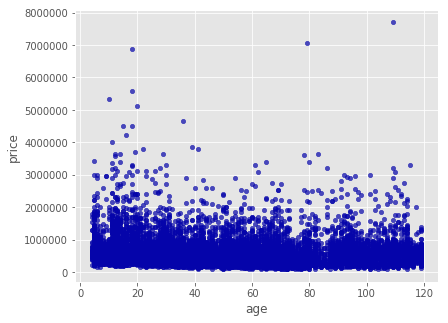

In [62]:
# Plotting the house price depency relative to every single feature gives a first idea of the relevant features
# and highlights the categorial variables.
for i in list(df.columns):
    df.plot(kind='scatter', x=i, y='price', figsize=(6.5, 5), alpha=0.7, color="#0504aa")

### Interim step - Categorial Features:

Before starting a regression, the scale level for the features must be taken into account, as nominal scaled features have to be transformed into binary categorial features.

The following features are nominal scaled and thus have to be transformed before performing the regression:
* Month
* Waterfront
* Zip-Code

The following features are ordinal scaled. For these it might be helpful to tranform the data as the regression result might be better then, however a transformation is not mandatory:
* grade
* condition

## Step 4: Identifying the relevant features

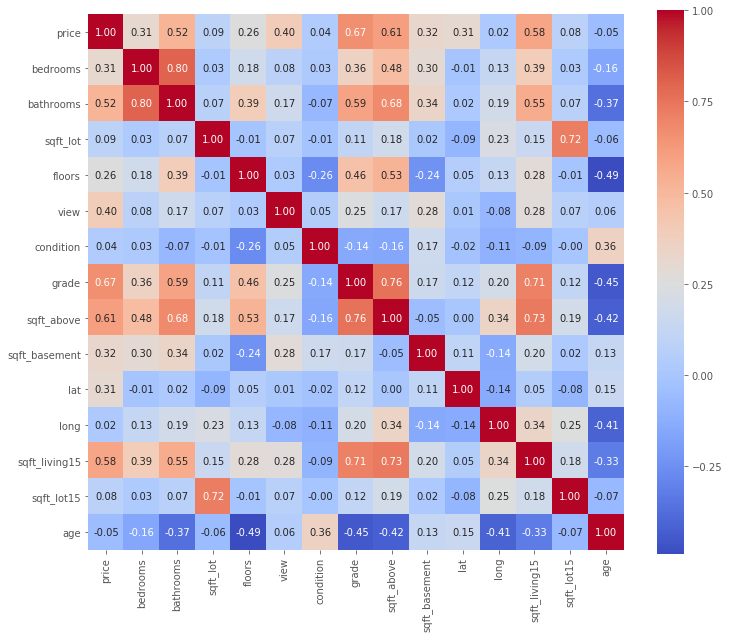

In [31]:
# removing categorial values from the dataset for the correlation matrix
dfcorr = df.copy()
dfcorr.drop("month", axis=1, inplace=True)
dfcorr.drop("zipcode", axis=1, inplace=True)
dfcorr.drop("waterfront", axis=1, inplace=True)

# calculate the correlation matrix
corr = dfcorr.corr()

# plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True, cmap="coolwarm")

In [32]:
# print features and their correlation with the house prices in an ascending order
most_correlated_indices = list(reversed((dfcorr.corr().get("price")).sort_values(ascending=True)[0:15].index))
most_correlated_values = list(reversed((dfcorr.corr().get("price")).sort_values(ascending=True)[0:15].values))
most_correlated = dict(zip(most_correlated_indices, most_correlated_values))
most_correlated

{'price': 1.0,
 'grade': 0.6677186959500531,
 'sqft_above': 0.6096110749456263,
 'sqft_living15': 0.5824500591361762,
 'bathrooms': 0.5180872417668311,
 'view': 0.3957662315142016,
 'sqft_basement': 0.3217850306562381,
 'bedrooms': 0.30905739979220165,
 'lat': 0.30637225270913065,
 'floors': 0.25879650925149267,
 'sqft_lot': 0.08742996719515407,
 'sqft_lot15': 0.08156229128673656,
 'condition': 0.037513834379179156,
 'long': 0.02171398497672199,
 'age': -0.05343331096158335}

It must be kept in mind that the categorial features have not been transformed yet. Therefore the correlation of these features has to be analyzed seperately, which is done in the following step:

In [33]:
model = 'price ~ C(month)'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.636
Date:                Sun, 03 Nov 2019   Prob (F-statistic):            0.00229
Time:                        12:05:07   Log-Likelihood:            -2.7293e+05
No. Observations:               19164   AIC:                         5.459e+05
Df Residuals:                   19152   BIC:                         5.460e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.263e+05   1.26e+04     41.678      0.000    5.02e+05    5.51e+05
C(month)[T.2]  -1.516e+04   1.69e+04     -0.898      0.369   -4.82e+04    1.79e+04
C(month)[T.3]   2.021e+04   1.56e+04      1.298      0.194   -1.03e+04    5.07e+04
C(month)[T.4]   3.857e+04   1.51e+04      2.550      0.011    8918.563    6.82e+04
C(month)[T.5]   2.482e+04   1.49e+04      1.661      0.097   -4466.862    5.41e+04
C(month)[T.6]   3.086e+04   1.52e+04      2.028      0.043    1040.061    6.07e+04
C(month)[T.7]   1.829e+04   1.51e+04      1.209      0.227   -1.14e+04    4.79e+04
C(month)[T.8]   1.082e+04   1.54e+04      0.701      0.483   -1.94e+04    4.11e+04
C(month)[T.9]   2837.2960   1.57e+04      0.180      0.857    -2.8e+04    3.37e+04
C(month)[T.10]   1.71e+04   1.56e+04      1.097      0.272   -1.34e+04    4.76e+04
C(month)[T.11] -3580.3235   1.64e+04     -0.219      0.827   -3.57e+04    2.85e+04
C(month)[T.12]  1670.7325   1.62e+04      0.103      0.918   -3.02e+04    3.35e+04
==============================================================================
Omnibus:                    17144.857   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1050664.623
Skew:                           4.085   Prob(JB):                         0.00
Kurtosis:                      38.342   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model = 'price ~ C(zipcode)'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     189.0
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:05:11   Log-Likelihood:            -2.6796e+05
No. Observations:               19164   AIC:                         5.361e+05
Df Residuals:                   19094   BIC:                         5.366e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.784e+05   1.59e+04     17.548      0.000    2.47e+05    3.09e+05
C(zipcode)[T.98002] -4.308e+04   2.66e+04     -1.617      0.106   -9.53e+04    9145.796
C(zipcode)[T.98003]  1.031e+04   2.39e+04      0.431      0.667   -3.66e+04    5.72e+04
C(zipcode)[T.98004]  1.094e+06   2.33e+04     46.948      0.000    1.05e+06    1.14e+06
C(zipcode)[T.98005]  5.355e+05   2.78e+04     19.286      0.000    4.81e+05     5.9e+05
C(zipcode)[T.98006]  5.968e+05    2.1e+04     28.469      0.000    5.56e+05    6.38e+05
C(zipcode)[T.98007]  3.437e+05   3.05e+04     11.272      0.000    2.84e+05    4.03e+05
C(zipcode)[T.98008]  3.771e+05   2.39e+04     15.765      0.000     3.3e+05    4.24e+05
C(zipcode)[T.98010]  1.467e+05   3.46e+04      4.244      0.000     7.9e+04    2.14e+05
C(zipcode)[T.98011]  2.124e+05   2.69e+04      7.900      0.000     1.6e+05    2.65e+05
C(zipcode)[T.98014]  1.931e+05   3.16e+04      6.115      0.000    1.31e+05    2.55e+05
C(zipcode)[T.98019]  1.519e+05   2.73e+04      5.573      0.000    9.85e+04    2.05e+05
C(zipcode)[T.98022]  3.758e+04   2.54e+04      1.478      0.139   -1.22e+04    8.74e+04
C(zipcode)[T.98023]  8251.0992   2.09e+04      0.395      0.693   -3.27e+04    4.92e+04
C(zipcode)[T.98024]  2.739e+05   3.73e+04      7.342      0.000    2.01e+05    3.47e+05
C(zipcode)[T.98027]  3.288e+05   2.18e+04     15.102      0.000    2.86e+05    3.71e+05
C(zipcode)[T.98028]  1.823e+05    2.4e+04      7.603      0.000    1.35e+05    2.29e+05
C(zipcode)[T.98029]  3.323e+05   2.31e+04     14.411      0.000    2.87e+05    3.77e+05
C(zipcode)[T.98030]  1.773e+04   2.45e+04      0.724      0.469   -3.03e+04    6.58e+04
C(zipcode)[T.98031]  2.165e+04   2.42e+04      0.893      0.372   -2.59e+04    6.92e+04
C(zipcode)[T.98032]  -2.83e+04   3.12e+04     -0.908      0.364   -8.94e+04    3.28e+04
C(zipcode)[T.98033]  5.261e+05   2.17e+04     24.272      0.000    4.84e+05    5.69e+05
C(zipcode)[T.98034]   2.46e+05   2.05e+04     11.985      0.000    2.06e+05    2.86e+05
C(zipcode)[T.98038]  8.779e+04   2.02e+04      4.347      0.000    4.82e+04    1.27e+05
C(zipcode)[T.98039]  1.891e+06   4.55e+04     41.507      0.000     1.8e+06    1.98e+06
C(zipcode)[T.98040]  9.049e+05   2.42e+04     37.319      0.000    8.57e+05    9.52e+05
C(zipcode)[T.98042]  3.282e+04   2.05e+04      1.600      0.110   -7391.171     7.3e+04
C(zipcode)[T.98045]  1.659e+05   2.62e+04      6.336      0.000    1.15e+05    2.17e+05
C(zipcode)[T.98052]  3.662e+05   2.03e+04     18.001      0.000    3.26e+05    4.06e+05
C(zipcode)[T.98053]  3.944e+05   2.19e+04     18.024      0.000    3.52e+05    4.37e+05
C(zipcode)[T.98055]  2.763e+04   2.45e+04      1.130      0.259   -2.03e+04    7.56e+04
C(zipcode)[T.98056]   1.44e+05   2.19e+04      6.589      0.000    1.01e+05    1.87e+05
C(z

In [35]:
model = 'price ~ C(waterfront)'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1519.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):          9.60e-320
Time:                        12:05:13   Log-Likelihood:            -2.7221e+05
No. Observations:               19164   AIC:                         5.444e+05
Df Residuals:                   19162   BIC:                         5.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.327e+05   2588.894    205.753      0.000    5.28e+05    5.38e+05
C(waterfront)[T.1.0]   1.16e+06   2.98e+04     38.969      0.000     1.1e+06    1.22e+06
==============================================================================
Omnibus:                    16027.935   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           888920.957
Skew:                           3.688   Prob(JB):                         0.00
Kurtosis:                      35.540   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model = 'price ~ C(grade)'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     2084.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:05:16   Log-Likelihood:            -2.6589e+05
No. Observations:               19164   AIC:                         5.318e+05
Df Residuals:                   19153   BIC:                         5.319e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        2.62e+05   2.57e+05      1.020      0.308   -2.41e+05    7.65e+05
C(grade)[T.4]   -4.82e+04   2.62e+05     -0.184      0.854   -5.61e+05    4.65e+05
C(grade)[T.5]  -1.149e+04   2.57e+05     -0.045      0.964   -5.16e+05    4.93e+05
C(grade)[T.6]   3.982e+04   2.57e+05      0.155      0.877   -4.64e+05    5.43e+05
C(grade)[T.7]   1.406e+05   2.57e+05      0.548      0.584   -3.63e+05    6.44e+05
C(grade)[T.8]   2.799e+05   2.57e+05      1.090      0.276   -2.23e+05    7.83e+05
C(grade)[T.9]   5.156e+05   2.57e+05      2.008      0.045    1.22e+04    1.02e+06
C(grade)[T.10]   8.17e+05   2.57e+05      3.180      0.001    3.13e+05    1.32e+06
C(grade)[T.11]  1.224e+06   2.57e+05      4.761      0.000     7.2e+05    1.73e+06
C(grade)[T.12]  1.949e+06   2.58e+05      7.546      0.000    1.44e+06    2.46e+06
C(grade)[T.13]  3.449e+06   2.66e+05     12.944      0.000    2.93e+06    3.97e+06
==============================================================================
Omnibus:                    14204.251   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           747733.084
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      32.987   Cond. No.                         523.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model = 'price ~ C(condition)'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     34.42
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.12e-28
Time:                        12:05:18   Log-Likelihood:            -2.7288e+05
No. Observations:               19164   AIC:                         5.458e+05
Df Residuals:                   19159   BIC:                         5.458e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.525e+05   7.39e+04      4.769      0.000    2.08e+05    4.97e+05
C(condition)[T.2] -1.989e+04   7.98e+04     -0.249      0.803   -1.76e+05    1.36e+05
C(condition)[T.3]  1.907e+05    7.4e+04      2.577      0.010    4.56e+04    3.36e+05
C(condition)[T.4]  1.685e+05   7.41e+04      2.274      0.023    2.33e+04    3.14e+05
C(condition)[T.5]  2.668e+05   7.45e+04      3.580      0.000    1.21e+05    4.13e+05
==============================================================================
Omnibus:                    17202.458   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1075107.314
Skew:                           4.100   Prob(JB):                         0.00
Kurtosis:                      38.765   Cond. No.                         77.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Overview of most relevant features
On the basis of the correlation matrix and the simple linear regressions for the categorial variables, the 10 most relevant features have been identified:

* sqft_above
* grade (categorial)
* zipcode (categorial)
* sqft_living15
* bathrooms
* view
* sqft_basement
* lat
* bedrooms
* floors

These features will now be included into the linear regression model.

## Step 5: Performing the linear regression

In [38]:
# Multiple linear regression for the most relevant features as defined above
model = 'price ~ sqft_above + C(grade) + C(zipcode) + sqft_living15 + bathrooms + view + sqft_basement + lat + bedrooms + floors'
smf.ols(formula=model, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     943.2
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:05:48   Log-Likelihood:            -2.5696e+05
No. Observations:               19164   AIC:                         5.141e+05
Df Residuals:                   19076   BIC:                         5.148e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.796e+06   3.19e+06     -2.753      0.006   -1.51e+07   -2.53e+06
C(grade)[T.4]       -1.766e+05   1.65e+05     -1.070      0.285      -5e+05    1.47e+05
C(grade)[T.5]       -1.913e+05   1.62e+05     -1.179      0.238   -5.09e+05    1.27e+05
C(grade)[T.6]       -1.991e+05   1.62e+05     -1.230      0.219   -5.16e+05    1.18e+05
C(grade)[T.7]       -2.021e+05   1.62e+05     -1.248      0.212   -5.19e+05    1.15e+05
C(grade)[T.8]       -1.869e+05   1.62e+05     -1.154      0.249   -5.04e+05    1.31e+05
C(grade)[T.9]       -1.212e+05   1.62e+05     -0.748      0.454   -4.39e+05    1.96e+05
C(grade)[T.10]       2823.7960   1.62e+05      0.017      0.986   -3.15e+05    3.21e+05
C(grade)[T.11]       1.842e+05   1.62e+05      1.135      0.257   -1.34e+05    5.02e+05
C(grade)[T.12]       6.118e+05   1.63e+05      3.747      0.000    2.92e+05    9.32e+05
C(grade)[T.13]        1.61e+06   1.69e+05      9.539      0.000    1.28e+06    1.94e+06
C(zipcode)[T.98002]  1.729e+04   1.51e+04      1.148      0.251   -1.22e+04    4.68e+04
C(zipcode)[T.98003] -8552.6342   1.35e+04     -0.632      0.527   -3.51e+04     1.8e+04
C(zipcode)[T.98004]  7.244e+05   2.46e+04     29.463      0.000    6.76e+05    7.73e+05
C(zipcode)[T.98005]  2.662e+05   2.57e+04     10.342      0.000    2.16e+05    3.17e+05
C(zipcode)[T.98006]  2.054e+05   2.06e+04      9.962      0.000    1.65e+05    2.46e+05
C(zipcode)[T.98007]  2.125e+05   2.66e+04      7.985      0.000     1.6e+05    2.65e+05
C(zipcode)[T.98008]  2.313e+05   2.45e+04      9.429      0.000    1.83e+05    2.79e+05
C(zipcode)[T.98010]  6.529e+04   1.96e+04      3.334      0.001    2.69e+04    1.04e+05
C(zipcode)[T.98011]    5.3e+04   3.37e+04      1.574      0.115    -1.3e+04    1.19e+05
C(zipcode)[T.98014]  2.085e+04   3.03e+04      0.689      0.491   -3.85e+04    8.02e+04
C(zipcode)[T.98019]  1.458e+04   3.27e+04      0.446      0.656   -4.95e+04    7.87e+04
C(zipcode)[T.98022]  1.716e+04   1.58e+04      1.086      0.277   -1.38e+04    4.81e+04
C(zipcode)[T.98023] -2.117e+04   1.18e+04     -1.792      0.073   -4.43e+04    1987.230
C(zipcode)[T.98024]  1.115e+05   2.69e+04      4.141      0.000    5.87e+04    1.64e+05
C(zipcode)[T.98027]  1.376e+05   1.89e+04      7.285      0.000    1.01e+05    1.75e+05
C(zipcode)[T.98028]  5.215e+04    3.3e+04      1.581      0.114   -1.25e+04    1.17e+05
C(zipcode)[T.98029]  1.772e+05   2.14e+04      8.287      0.000    1.35e+05    2.19e+05
C(zipcode)[T.98030] -2875.8043   1.44e+04     -0.200      0.842   -3.11e+04    2.54e+04
C(zipcode)[T.98031]  8721.8909   1.51e+04      0.578      0.563   -2.09e+04    3.83e+04
C(zipcode)[T.98032]   270.9702   1.81e+04      0.015      0.988   -3.52e+04    3.58e+04
C(zipcode)[T.98033]   2.99e+05   2.78e+04     10.745      0.000    2.44e+05    3.54e+05
C(z

The created multi linear regression model is able to explain 81% of the variance of the house prices.

**Explanations:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

Second Table: Coefficient Reports 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

Third Table: Residuals, Autocorrelation, and Multicollinearity 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: It provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

## Step 6: Conclusions / Recommendations

### Recommendations for house seller in King County
1. The King County grading system is highly correlated to the house prices.
**Our recommendation:** Before selling your house, put some work into it so that it is higher graded afterwards. If you cannot do it by yourself, find some craftsmen to get this job done for you. This significantly increases the selling price of the house.
* If the number of bathrooms in your house is lower than the average bathrooms per bedrooms rate, you should transform a small amount of the living space into another bathroom. The number of bathrooms clearly correlates to the selling price of the houses.

### Recommendations for house buyers in King County
1. The King County grading system is highly correlated to the house prices.
**Our recommendation:** Buy a house that is graded a bit lower than your personal demands. Put some work into it so that the house is higher graded afterwards. If you cannot do it by yourself, find some craftsmen to get this job done for you.
* The closer a house is located at the water, the higher the price. If living close to the water is not important for you, avoid it!
* The house price is highly dependent on the zip codes. In order to find a cheap house, certain zip codes shall be avoided.

## 7. Outlook / Next steps

* Testing the prediction quality of the model by using test data
* Outliers: Outliers might have a negative impact onto the regression. Due to the high number data objects considered for this analysis, the impact will be manageable, still we should have a look at it and analyze the impact by removing them.
* Cluster analysis: The zip-codes might be helpful to group and cluster the given dataset, which is likely very helpful with regard to make more precise house price predictions.